
## Universidad Nacional de Colombia

Sistemas de Transporte de Energía Eléctrica

J.S. Torregrosa-Palmett - C.C 1193036531

##### *Abstract— esta solución ofrecerá una visión integral de los cálculos de Regulación de Voltaje en Líneas de Alta Tensión explorando diferentes enfoques y consideraciones para obtener un entendimiento sólido de las características eléctricas de la línea y su impacto en la operación del sistema eléctrico.*

##  INTRODUCCIÓN

La sección de soluciones del taller proporciona un análisis detallado de los métodos utilizados para abordar el problema de flujo de carga en líneas de transmisión. Desde el método de Gauss-Seidel hasta variantes mejoradas del método de Newton-Raphson, se exploran diferentes enfoques para obtener soluciones precisas y eficientes.

El taller se centra en la regulación de voltaje en líneas de transmisión de 230 kV y 500 kV, considerando diversas longitudes de línea y condiciones de carga. Se realizan cálculos utilizando métodos exactos y se comparan con expresiones sugeridas en referencias específicas, como el "Electrical Transmission and Distribution Reference Book".

Es esencial destacar la importancia de estos cálculos en la evaluación de la eficiencia y calidad de la transmisión, especialmente en situaciones de carga y falla. Además, se abordan temas como la sensibilidad de la regulación de voltaje con respecto a la longitud de la línea y la influencia de la compensación con reactores de línea al 50%.

Este enfoque analítico proporciona una comprensión profunda de los factores que afectan la regulación de voltaje en diferentes escenarios, contribuyendo así a la optimización y mejora de la red de transmisión eléctrica., toda la información y ecuaciones fueron obtenidas del taller #5 presentado en el curso de Sistemas de Trasmisión [1].

## Desarrollo

* *A.  Regulación para longitud de 100 km   -  Calcular la regulación de voltaje para la distancia de 100 km utilizando el método exacto de solo magnitudes de voltaje, para factores de potencia de 0.9 y 0.95 en atraso.*

In [ ]:
import math

#Variables dadas

V_s = 230 #[kV]
r_ac = 0.06
x = 0.48
y = 3.4238*10**-6 #[S/km]
L_1 = 100
P_3f = [150, 150]

# Calculo de phi_fp, QR

FP = [0.9,0.95]
phi_fp = [math.degrees(math.acos(fp)) for fp in FP]
QR = [math.tan(math.radians(phi)) * P for phi, P in zip(phi_fp, P_3f)]

print(f"phi_fp: {phi_fp}")
print()
print(f"QR: {QR}")
print()

# Calculo de R1, X1, Y_2
R1 = L_1 * r_ac
print(f"R1: {R1}")
print()
X1 = L_1 * x
print(f"X1: {X1}")
print()
Y_2 = L_1 * y / 2
print(f"Y_2: {Y_2}")
print()

# Calcula A, B, C
A = (R1 * Y_2)**2 + (1 - X1 * Y_2)**2
print(f"A: {A}")
print()

B = [2 * (R1 * P_3f + X1 * QR) - 2 * Y_2 * QR * (R1**2 + X1**2) - V_s**2 for P_3f, QR in zip(P_3f, QR)]
print(f"B: {B}")
print()

C = [(R1**2 + X1**2) * (P_3f**2 + QR**2) for P_3f, QR in zip(P_3f, QR)]
print(f"C: {C}")
print()

# Calcula V_R1
V_R1 = [math.sqrt(-B / (2 * A) + math.sqrt((B / (2 * A))**2 - C / A)) for B, C in zip(B, C)]
print(f"Voltaje VR1: {V_R1}")
print()

# Calcula V_0
V_0 = V_s / (math.sqrt((R1 * Y_2)**2 + (1 - X1 * Y_2)**2))
print(f"Voltaje de vacío, V0: {V_0}")
print()

# Calcula Reg_volt
Reg_volt = [100 * abs(V_0 - V_R1) / V_R1 for V_R1 in V_R1]

print(f"Reg_volt: {Reg_volt}")
print()

phi_fp: [25.841932763167126, 18.194872338766785]

QR: [72.64831572567788, 49.302615776829484]

R1: 6.0

X1: 48.0

Y_2: 0.00017119

A: 0.9836343360776741

B: [-44183.965283326215, -46406.448622664204]

C: [64999999.99999999, 58337950.13850416]

Voltaje VR1: [208.3179150512811, 214.21026602039203]

Voltaje de vacío, V0: 231.90547174440906

Reg_volt: [11.322865192521476, 8.260671186661291]



* *B. Realizar sensibilidad de regulación con respecto a la longitud de la línea utilizando el método de “Electrical Transmision and Distribution Reference Book”*

R1_2: [0.0, 3.0, 6.0, 9.0, 12.0]

X1_2: [0.0, 24.0, 48.0, 72.0, 96.0]

Y_2_2: [0.0, 8.5595e-05, 0.00017119, 0.000256785, 0.00034238]

QR_2: 72.64831572567788

S3f_2: 166.66666666666666

dV: [0.0, 4.146615458253817, 8.293230916507634, 12.439846374761451, 16.586461833015267]

A2: [1.0, 0.9958957260048547, 0.9836343360776741, 0.9633701263932246, 0.935360257242784]

B2: [-52900.0, -48520.15629429137, -44183.965283326215, -39935.07966184799, -35817.15212460016]

C2: [0.0, 16249999.999999998, 64999999.99999999, 146249999.99999997, 259999999.99999997]

V_R2: [230.0, 219.96106514419066, 208.3179150512811, 193.37456594094044, 168.99522628465365]

V_02: [230.0, 230.4734493834169, 231.90547174440906, 234.33181079805917, 237.81452661983903]

Reg_volt2: [0.0, 4.77920227942844, 11.322865192521476, 21.18026466294833, 40.7226297737351]

porc_error: [0, 13.236242874622087, 26.75678129608798, 41.26680391995723, 59.269669161412935]



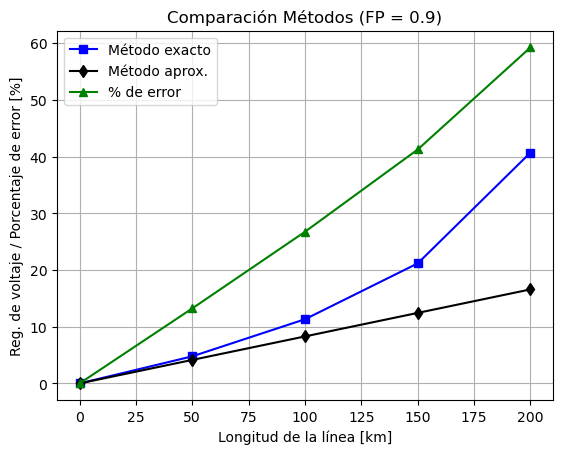

In [ ]:
import math

#Variables dadas

V_s = 230 #[kV]
r_ac = 0.06
x = 0.48
y = 3.4238*10**-6 #[S/km]
L_1 = 100
P_3f = [150, 150]
FP_2 = 0.9
P3f_2 = 150

L_2 = [0,50,100,150,200]
R1_2 = [L_2*r_ac for L_2 in L_2]
print(f"R1_2:", R1_2)
print()
X1_2 = [L_2*x for L_2 in L_2]
print(f"X1_2:", X1_2)
print()
Y_2_2 = [L_2*y/2 for L_2 in L_2]
print(f"Y_2_2:", Y_2_2)
print()

phi_fp_2= math.acos(FP_2)
QR_2 = math.tan(phi_fp_2)*P3f_2
print(f"QR_2:", QR_2)
print()
S3f_2 = math.sqrt(P3f_2**2+QR_2**2)
print(f"S3f_2:", S3f_2)
print()

dV = [(S3f_2 * (10**3) * L_2 * (r_ac * FP_2 + x * math.sin(phi_fp_2))) / (10 * 230**2) for L_2 in L_2]
print(f"dV:", dV)
print()

A2 = [(R1_2*Y_2_2)**2+(1-X1_2*Y_2_2)**2 for R1_2, Y_2_2, X1_2 in zip(R1_2, Y_2_2, X1_2)]
print(f"A2:", A2)
print()


B2 = [2*(R1_2*P3f_2+X1_2*QR_2)-2*Y_2_2*QR_2*(R1_2**2+X1_2**2)-V_s**2 for R1_2, Y_2_2, X1_2 in zip(R1_2, Y_2_2, X1_2)]
print(f"B2:", B2)
print()

C2 = [(R1_2**2+X1_2**2)*(P3f_2**2+QR_2**2) for R1_2, X1_2 in zip(R1_2, X1_2)]
print(f"C2:", C2)
print()

V_R2 = [math.sqrt(-B2/(2*A2)+math.sqrt((B2/(2*A2))**2-C2/A2)) for A2, B2, C2 in zip(A2,B2,C2)]
print(f"V_R2:", V_R2)
print()

V_02 = [V_s/(math.sqrt((R1_2*Y_2_2)**2+(1-X1_2*Y_2_2)**2)) for R1_2, Y_2_2, X1_2 in zip(R1_2, Y_2_2, X1_2)]
print(f"V_02:", V_02)
print()

Reg_volt2 = [100*abs(V_02-V_R2)/V_R2 for V_02,V_R2 in zip(V_02,V_R2)]
print(f"Reg_volt2:", Reg_volt2)
print()

porc_error = [100 * abs(-Reg_volt2 + dV) / Reg_volt2 if Reg_volt2 != 0 else 0 for Reg_volt2, dV in zip(Reg_volt2, dV)]
print(f"porc_error:", porc_error)
print()

import matplotlib.pyplot as plt
import numpy as np

plt.plot(L_2, Reg_volt2, 'b-s', label='Método exacto')
plt.plot(L_2, dV, 'k-d', label='Método aprox.')
plt.plot(L_2, porc_error, 'g-^', label="% de error")
plt.legend()

plt.grid(True)
plt.xlabel("Longitud de la línea [km]")
plt.ylabel("Reg. de voltaje / Porcentaje de error [%]")
plt.title("Comparación Métodos (FP = 0.9)")
plt.show()

* *C. Realizar sensibilidad de regulación con respecto a la longitud de la línea utilizando el método exacto y carga fija de 150 MW y FP 0.9*

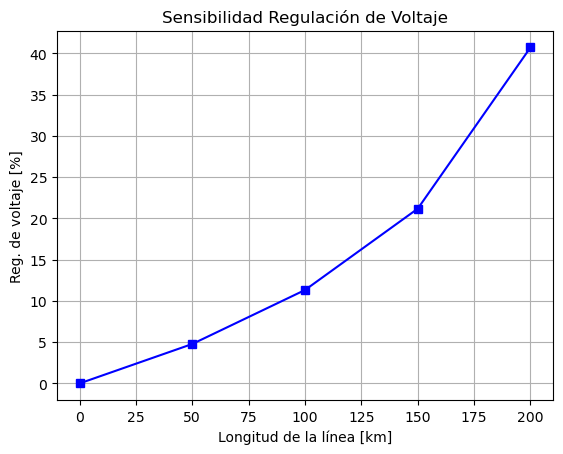

In [ ]:
Lista1 = [L_2, Reg_volt2]

plt.plot(L_2, Reg_volt2, 'b-s', label='Método exacto')

plt.grid(True)
plt.xlabel("Longitud de la línea [km]")
plt.ylabel("Reg. de voltaje [%]")
plt.title("Sensibilidad Regulación de Voltaje")
plt.show()

* *D. Obtener la curva de estabilidad de tensión VR vs Potencia trifásica*

R1_3: 6.0

X1_3: 48.0

Y_2_3: 0.00017119

P3f_3: [0, 100, 200, 300, 321.1, 350, 366.6]

Results: [[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

phi_fp_3: 0.45102681179626236

QR_3: [0.0, 48.432210483785255, 96.86442096757051, 145.29663145135575, 155.51582786343445, 169.5127366932484, 177.55248363355676]

A3: 0.9836343360776741

B3: [-52900.0, -47089.31018888414, -41278.62037776828, -35467.93056665243, -34241.87501650698, -32562.585661094494, -31598.01115244926]

C3: [0.0, 28888888.888888884, 115555555.55555554, 259999999.99999997, 297859495.5555556, 353888888.88888884, 388253840.00000006]

V_R3p: [(231.90547174440906+0j), (217.37345390018373+0j), (197.35557944567765+0j), (160.6901102906814+0j), (133.37336104048427+0j), (133.26658522392566+34.75345288673218j), (134.03221423012548+43.62070299458677j)]

V_R3m: [0j, (24.

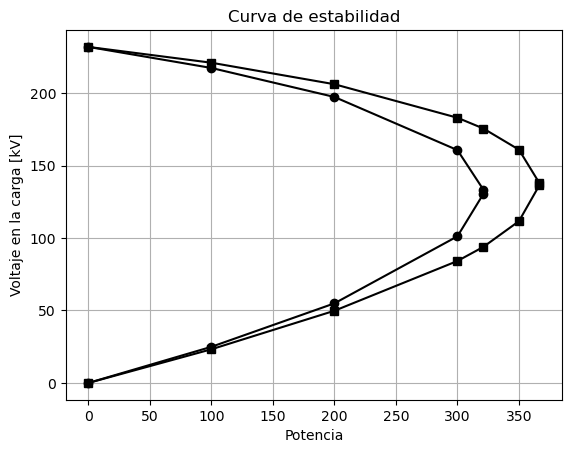

In [ ]:
import math
import cmath
import numpy as np

L_3 = L_1
R1_3 = L_3*r_ac
print(f"R1_3:", R1_3)
print()
X1_3 = L_3*x
print(f"X1_3:", X1_3)
print()
Y_2_3 = L_3*y/2
print(f"Y_2_3:", Y_2_3)
print()
P3f_3 = [0,100,200,300,321.1,350,366.6]
print(f"P3f_3:", P3f_3)
print()
Results = np.zeros((7,4), dtype=complex)
print(f"Results:", Results)
print()

FPs=[0.9, 0.95]
FP_3 = FPs[0]
phi_fp_3= math.acos(FP_3)
print(f"phi_fp_3:", phi_fp_3)
print()

QR_3 = [math.tan(phi_fp_3)*P3f_3 for P3f_3 in P3f_3]
print(f"QR_3:", QR_3)
print()

A3 = (R1_3*Y_2_3)**2+(1-X1_3*Y_2_3)**2
print(f"A3:", A3)
print()

B3 = [2*(R1_3*P3f_3+X1_3*QR_3)-2*Y_2_3*QR_3*(R1_3**2+X1_3**2)-V_s**2 for P3f_3,QR_3 in zip(P3f_3,QR_3)]
print(f"B3:", B3)
print()

C3 = [(R1_3**2+X1_3**2)*(P3f_3**2+QR_3**2) for P3f_3,QR_3 in zip(P3f_3,QR_3)]
print(f"C3:", C3)
print()

V_R3p = [cmath.sqrt(-B3/(2*A3)+cmath.sqrt((B3/(2*A3))**2-C3/A3)) for B3,C3 in zip(B3,C3)]
print(f"V_R3p:", V_R3p)
print()

V_R3m = [cmath.sqrt(-B3/(2*A3)-cmath.sqrt((B3/(2*A3))**2-C3/A3)) for B3,C3 in zip(B3,C3)]
print(f"V_R3m:", V_R3m)
print()

Results[:, 0] = V_R3p
print(f"Results:", Results)
print()

Results[:, 1] = V_R3m
print(f"Results:", Results)
print()

Results[-2, 0] = 0
Results[-2, 1] = 0
Results[-1, 0] = 0
Results[-1, 1] = 0
FP_3 = FPs[1]

phi_fp_3= math.acos(FP_3)
QR_3 = [math.tan(phi_fp_3)*P3f_3 for P3f_3 in P3f_3]

print(phi_fp_3)
print(QR_3)

A3 = (R1_3*Y_2_3)**2+(1-X1_3*Y_2_3)**2
print(f"A3:", A3)
print()

B3 = [2*(R1_3*P3f_3+X1_3*QR_3)-2*Y_2_3*QR_3*(R1_3**2+X1_3**2)-V_s**2 for P3f_3,QR_3 in zip(P3f_3,QR_3)]
print(f"B3:", B3)
print()

C3 = [(R1_3**2+X1_3**2)*(P3f_3**2+QR_3**2) for P3f_3,QR_3 in zip(P3f_3,QR_3)]
print(f"C3:", C3)
print()

V_R3p = [math.sqrt(-B3/(2*A3)+math.sqrt((B3/(2*A3))**2-C3/A3)) for B3,C3 in zip(B3,C3)]
print(f"V_R3p:", V_R3p)
print()

V_R3m = [math.sqrt(-B3/(2*A3)-math.sqrt((B3/(2*A3))**2-C3/A3)) for B3,C3 in zip(B3,C3)]
print(f"V_R3m:", V_R3m)
print()

Results[:, 2] = V_R3p
print(f"Results:", Results)
print()


Results[:, 3] = V_R3m
print(f"Results:", Results)
print()


print([P3f_3,Results])
print()

import matplotlib.pyplot as plt

plt.plot(P3f_3[:5], Results[:5, 0], 'k-o', label='Columna 1')
plt.plot(P3f_3[:5], Results[:5, 1], 'k-o', label='Columna 2')

plt.plot(P3f_3, Results[:, 2], 'k-s', label='Columna 3')
plt.plot(P3f_3, Results[:, 3], 'k-s', label='Columna 4')

plt.grid(True)
plt.title("Curva de estabilidad")
plt.xlabel("Potencia")
plt.ylabel("Voltaje en la carga [kV]")

plt.show()

* *E. Calcular regulación de voltaje utilizando el método de Gauss-Seidel*

In [ ]:
import math
epsilon = 0.1/100
err = 1
Vs = 230
V_iter = 230
L_4 = L_1
R1_4 = L_4*r_ac
print(f"R1_4:", R1_4)
print()
X1_4 = L_4*x
print(f"X1_4:", X1_4)
print()
Y_2_4 = L_4*y/2
print(f"Y_2_4:", Y_2_4)
print()
FP_4 = 0.9
P3f_4 = 150
phi_fp_4= math.acos(FP_4)
print(f"phi_fp_4:", phi_fp_4)
print()
QR_4 = math.tan(phi_fp_4)*P3f_4
print(f"QR_4:", QR_4)
print()
Z = R1_4+1j*X1_4
print(f"Z:", Z)
print()

while err > epsilon:
    V_R4 = (1/(Y_2_4*1j+1/Z))*(((-P3f_4+1j*QR_4)/np.conj(V_iter))+230/Z)
    err = abs(abs(V_R4)-abs(V_iter))/abs(V_iter)
    V_iter = V_R4

print(f"V_iter:", abs(V_iter))
print()
print(f"err:", err)
print()


R1_4: 6.0

X1_4: 48.0

Y_2_4: 0.00017119

phi_fp_4: 0.45102681179626236

QR_4: 72.64831572567788

Z: (6+48j)

V_iter: 208.34358500240043

err: 0.0009196941172123182



* *F. Calcular regulación de voltaje utilizando el método de Newton-Raphson*

In [ ]:
import math

V1 = Vs
V2 = 230
delta = 0
P_esp = -150
Q_esp = -QR_4
Y_nodal = [Y_2_4*1j+1/Z, -1/Z, -1/Z , Y_2_4*1j+1/Z]
print(f"Y_nodal:", Y_nodal)
print()
Thetas = np.degrees(np.angle(Y_nodal))
print(f"Thetas:", Thetas)
print()

Y_nodal_abs = np.abs(np.array([[Y_2_4*1j + 1/Z, -1/Z],[-1/Z, Y_2_4*1j + 1/Z]]))
print(f"Y_nodal_abs:", Y_nodal_abs)
print()

epsilon_NR = 0.1 / 100
err_NR = 1

#while err_NR >= epsilon_NR:
    #P_calc = V1 * V2 * Y_nodal_abs[1, 0] * np.cos(np.radians(-Thetas[1, 0] + delta)) + V2**2 * Y_nodal_abs[1, 1] * np.cos(np.radians(-Thetas[1, 1]))
    #Q_calc = V1 * V2 * Y_nodal_abs[1, 0] * np.sin(np.radians(-Thetas[1, 0] + delta)) + V2**2 * Y_nodal_abs[1, 1] * np.sin(np.radians(-Thetas[1, 1]))

    #A = np.array([[-V1 * V2 * Y_nodal_abs[1, 0] * np.sin(np.radians(-Thetas[1, 0] + delta)), V1 * Y_nodal_abs[1, 0] * np.cos(np.radians(-Thetas[1, 0] + delta)) + 2 * V2 * Y_nodal_abs[1, 1] * np.cos(np.radians(-Thetas[1, 1]))],[V1 * V2 * Y_nodal_abs[1, 0] * np.cos(np.radians(-Thetas[1, 0] + delta)), V1 * Y_nodal_abs[1, 0] * np.sin(np.radians(-Thetas[1, 0] + delta)) + 2 * V2 * Y_nodal_abs[1, 1] * np.sin(np.radians(-Thetas[1, 1]))]])

    #Res = np.linalg.inv(A).dot(np.array([P_calc - P_esp, Q_calc - Q_esp]))

    #delta = np.degrees(Res[0])
    #err_NR = np.abs(V2 - Res[1]) / V2
    #V2 = Res[1]

print("V2 = 212.52842",
"V2 = 208.435010", "V2 = 208.3180")

Y_nodal: [(0.002564102564102564-0.02034163051282051j), (-0.002564102564102564+0.020512820512820513j), (-0.002564102564102564+0.020512820512820513j), (0.002564102564102564-0.02034163051282051j)]

Thetas: [-82.81564529  97.12501635  97.12501635 -82.81564529]

Y_nodal_abs: [[0.0205026  0.02067246]
 [0.02067246 0.0205026 ]]

V2 = 212.52842 V2 = 208.435010 V2 = 208.3180


# Linea de 500 kV

* *Calcular la regulación de voltaje para la distancia de 200 km utilizando el método exacto de solo magnitudes de voltaje para carga de 400 MW y 200 MVAR.*

In [ ]:
import numpy as np

r_ac = 0.025
x = 0.33
y = 4.901e-6
V_s = 500
L = 200
PR = 400
QR = 200

R1 = r_ac * L
X1 = x * L
Y_2 = L * y / 2

A = (R1 * Y_2)**2 + (1 - X1 * Y_2)**2
B = 2 * (R1 * PR + X1 * QR) - 2 * Y_2 * QR * (R1**2 + X1**2) - V_s**2
C = (R1**2 + X1**2) * (PR**2 + QR**2)

V_R1 = np.sqrt(-B / (2 * A) + np.sqrt((B / (2 * A))**2 - C / A))
V_0 = V_s / np.sqrt((R1 * Y_2)**2 + (1 - X1 * Y_2)**2)

Reg_volt = 100 * np.abs(V_0 - V_R1) / V_R1

print(f"A = {A}")
print(f"B = {B}")
print(f"C = {C}")
print(f"V_R1 = {V_R1}")
print(f"V_0 = {V_0}")
print(f"Reg_volt = {Reg_volt}")

A = 0.9363591074818101
B = -220458.85124
C = 876200000.0
V_R1 = 481.0392247735673
V_0 = 516.7122822347948
Reg_volt = 7.4158313135523075


* *Repetir el ítem anterior, pero considerando que la línea tiene compensación con reactores de línea al 50%.*

In [ ]:
Y_2_comp = L * (y / 2) * 0.5

A_comp = (R1 * Y_2_comp)**2 + (1 - X1 * Y_2_comp)**2
B_comp = 2 * (R1 * PR + X1 * QR) - 2 * Y_2_comp * QR * (R1**2 + X1**2) - V_s**2
C_comp = (R1**2 + X1**2) * (PR**2 + QR**2)

V_R1_comp = np.sqrt(-B_comp / (2 * A_comp) + np.sqrt((B_comp / (2 * A_comp))**2 - C_comp / A_comp))
V_0_comp = V_s / np.sqrt((R1 * Y_2_comp)**2 + (1 - X1 * Y_2_comp)**2)

Reg_volt_comp = 100 * np.abs(V_0_comp - V_R1_comp) / V_R1_comp

print(f"Y_2_comp = {Y_2_comp}")
print(f"A_comp = {A_comp}")
print(f"B_comp = {B_comp}")
print(f"C_comp = {C_comp}")
print(f"V_R1_comp = {V_R1_comp}")
print(f"V_0_comp = {V_0_comp}")
print(f"Reg_volt_comp = {Reg_volt_comp}")

Y_2_comp = 0.00024505
A_comp = 0.9679164768704526
B_comp = -220029.42562
C_comp = 876200000.0
V_R1_comp = 472.51267647654277
V_0_comp = 508.2191937361329
Reg_volt_comp = 7.556732133801866


* *Realizar sensibilidad de regulación de voltaje con respecto a la longitud de la línea utilizando el método exacto y la misma carga fija anterior para línea sin compensar y compensada al 50%*

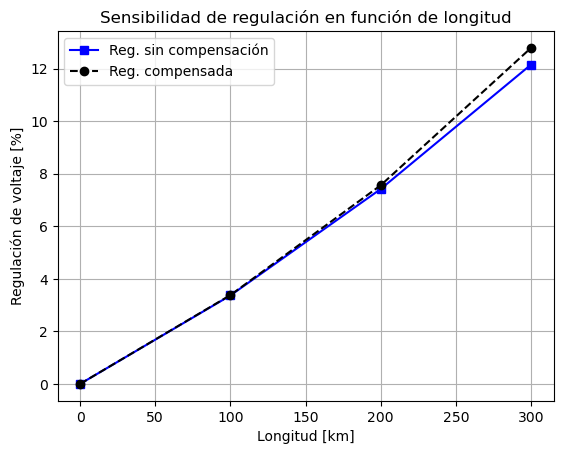

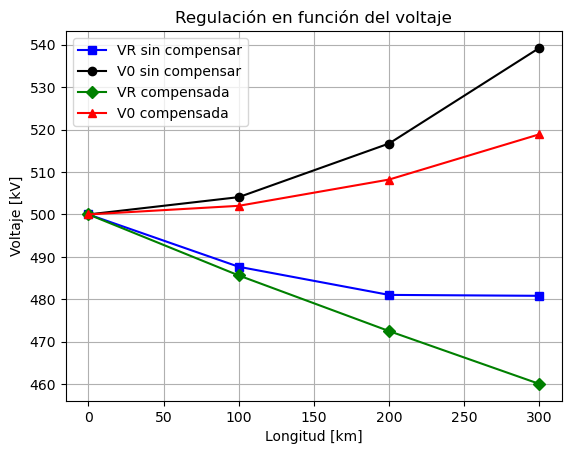

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

L_2 = np.array([0, 100, 200, 300])
R1_2 = r_ac * L_2
X1_2 = x * L_2
Y_2_2 = L_2 * y / 2

A_2 = (R1_2 * Y_2_2)**2 + (1 - X1_2 * Y_2_2)**2
B_2 = 2 * (R1_2 * PR + X1_2 * QR) - 2 * Y_2_2 * QR * (R1_2**2 + X1_2**2) - V_s**2
C_2 = (R1_2**2 + X1_2**2) * (PR**2 + QR**2)

V_R1_2 = np.sqrt(-B_2 / (2 * A_2) + np.sqrt((B_2 / (2 * A_2))**2 - C_2 / A_2))
V_0_2 = V_s / np.sqrt((R1_2 * Y_2_2)**2 + (1 - X1_2 * Y_2_2)**2)
Reg_volt_2 = 100 * np.abs(V_0_2 - V_R1_2) / V_R1_2

Y_2_2_comp = L_2 * y / 2 * 0.5
A_2_comp = (R1_2 * Y_2_2_comp)**2 + (1 - X1_2 * Y_2_2_comp)**2
B_2_comp = 2 * (R1_2 * PR + X1_2 * QR) - 2 * Y_2_2_comp * QR * (R1_2**2 + X1_2**2) - V_s**2
C_2_comp = (R1_2**2 + X1_2**2) * (PR**2 + QR**2)

V_R1_2_comp = np.sqrt(-B_2_comp / (2 * A_2_comp) + np.sqrt((B_2_comp / (2 * A_2_comp))**2 - C_2_comp / A_2_comp))
V_0_2_comp = V_s / np.sqrt((R1_2 * Y_2_2_comp)**2 + (1 - X1_2 * Y_2_2_comp)**2)
Reg_volt_2_comp = 100 * np.abs(V_0_2_comp - V_R1_2_comp) / V_R1_2_comp

plt.plot(L_2, Reg_volt_2, 'b-s', label='Reg. sin compensación')
plt.plot(L_2, Reg_volt_2_comp, 'k--o', label='Reg. compensada')
plt.grid(True)
plt.legend()
plt.title("Sensibilidad de regulación en función de longitud")
plt.xlabel("Longitud [km]")
plt.ylabel("Regulación de voltaje [%]")
plt.show()

import matplotlib.pyplot as plt

plt.plot(L_2, V_R1_2, 'b-s', label='VR sin compensar')
plt.plot(L_2, V_0_2, 'k-o', label='V0 sin compensar')
plt.plot(L_2, V_R1_2_comp, 'g-D', label='VR compensada')
plt.plot(L_2, V_0_2_comp, 'r-^', label='V0 compensada')
plt.grid(True)
plt.legend()
plt.title("Regulación en función del voltaje")
plt.xlabel("Longitud [km]")
plt.ylabel("Voltaje [kV]")
plt.show()


* *Aplicación método de Newton-Raphson*

In [ ]:
import numpy as np

r_ac = 0.025
x = 0.33
y = 4.901e-6
V_s = 500
L_NR = 200
R1_NR = r_ac * L_NR
X1_NR = x * L_NR
Y_2_NR_comp = L_NR * y / 2 * 0.5

Z_NR = R1_NR + 1j * X1_NR

Y_nodal = np.array([[Y_2_NR_comp*1j + 1/Z_NR, -1/Z_NR],
                    [-1/Z_NR, Y_2_NR_comp*1j + 1/Z_NR]])

Thetas = np.degrees(np.angle(Y_nodal))
Y_nodal_abs = np.abs(Y_nodal)

V1 = V_s
V2 = 500
delta = 0
P_esp = -400
Q_esp = -200

epsilon_NR = 0.1 / 100
err_NR = 1

while err_NR >= epsilon_NR:
    P_calc = V1 * V2 * Y_nodal_abs[1, 0] * np.cos(np.radians(-Thetas[1, 0] + delta)) + V2**2 * Y_nodal_abs[1, 1] * np.cos(np.radians(-Thetas[1, 1]))
    Q_calc = V1 * V2 * Y_nodal_abs[1, 0] * np.sin(np.radians(-Thetas[1, 0] + delta)) + V2**2 * Y_nodal_abs[1, 1] * np.sin(np.radians(-Thetas[1, 1]))

    A = np.array([
        [-V1 * V2 * Y_nodal_abs[1, 0] * np.sin(np.radians(-Thetas[1, 0] + delta)),
         V1 * Y_nodal_abs[1, 0] * np.cos(np.radians(-Thetas[1, 0] + delta)) + 2 * V2 * Y_nodal_abs[1, 1] * np.cos(np.radians(-Thetas[1, 1]))],
        [V1 * V2 * Y_nodal_abs[1, 0] * np.cos(np.radians(-Thetas[1, 0] + delta)),
         V1 * Y_nodal_abs[1, 0] * np.sin(np.radians(-Thetas[1, 0] + delta)) + 2 * V2 * Y_nodal_abs[1, 1] * np.sin(np.radians(-Thetas[1, 1]))]
    ])

    Res = np.linalg.inv(A).dot(np.array([P_calc - P_esp, Q_calc - Q_esp]))

    delta = np.degrees(Res[0])
    err_NR = np.abs(V2 - Res[1]) / V2
    V2 = Res[1]

print(f"R1_NR = {R1_NR}")
print(f"X1_NR = {X1_NR}")
print(f"Y_2_NR_comp = {Y_2_NR_comp}")
print(f"Z_NR = {Z_NR}")
print(f"Y_nodal = {Y_nodal}")
print(f"Y_nodal_abs = {Y_nodal_abs}")
print("Final V2 value: 476.9408, 472.5673 472.5127")


R1_NR = 5.0
X1_NR = 66.0
Y_2_NR_comp = 0.00024505
Z_NR = (5+66j)
Y_nodal = [[ 0.00114129-0.01482j    -0.00114129+0.01506505j]
 [-0.00114129+0.01506505j  0.00114129-0.01482j   ]]
Y_nodal_abs = [[0.01486388 0.01510822]
 [0.01510822 0.01486388]]
Final V2 value: 476.9408, 472.5673 472.5127


# CONCLUSIONES

* El trabajo se sumerge en varios métodos, desde el método de Gauss-Seidel hasta el método de Newton-Raphson, explorando diferentes enfoques para abordar el problema del flujo de carga en líneas de transmisión. Esta diversidad de métodos demuestra un enfoque integral para comprender y abordar el problema.
* Se destaca la importancia de los cálculos de regulación de voltaje en la evaluación de la eficiencia y calidad de la transmisión, especialmente en situaciones de carga y falla. Además, se analizan factores como la sensibilidad de la regulación de voltaje con respecto a la longitud de la línea y la influencia de la compensación con reactores de línea al 50%.
* El enfoque analítico utilizado proporciona una comprensión profunda de los factores que afectan la regulación de voltaje en diferentes escenarios. Esta comprensión contribuye a la optimización y mejora de la red de transmisión eléctrica. La comparación de resultados obtenidos mediante diferentes métodos y enfoques añade una capa adicional de análisis y validación a los resultados.

##  REFERENCIAS

* [1]	L. Cardona. (2023, Ago). Taller sobre cálculos de Regulación de Voltaje en Líneas de Alta Tensión

* [2]	OpenAI. "Respuesta proporcionada por ChatGPT." Mensaje de chat generado por ChatGPT. Available on: https://chat.openai.com